In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import svm, metrics
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

np.random.seed(0)

import seaborn as sns

sns.set(font_scale=1.2)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#variables to use in this kaggle
(x,y,z) = 50,168.6,"learning"
print(x,y,z)
A = "indiaindiafkdjsgfdgdfindia"
print(A)
print(A*7,'\n')
print(A.replace('india',' REPLACED '))


50 168.6 learning
indiaindiafkdjsgfdgdfindia
indiaindiafkdjsgfdgdfindiaindiaindiafkdjsgfdgdfindiaindiaindiafkdjsgfdgdfindiaindiaindiafkdjsgfdgdfindiaindiaindiafkdjsgfdgdfindiaindiaindiafkdjsgfdgdfindiaindiaindiafkdjsgfdgdfindia 

 REPLACED  REPLACED fkdjsgfdgdf REPLACED 


In [4]:
print('We want to show an example of Support Vector Machines for machine learning / data mining')
import pickle

recs = pd.read_csv("/kaggle/input/recipes-muffins-cupcakes-in-svm/recipes_muffins_cupcakes.csv")
print(recs.head())

We want to show an example of Support Vector Machines for machine learning / data mining
     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


We want to plot our data using SNS


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


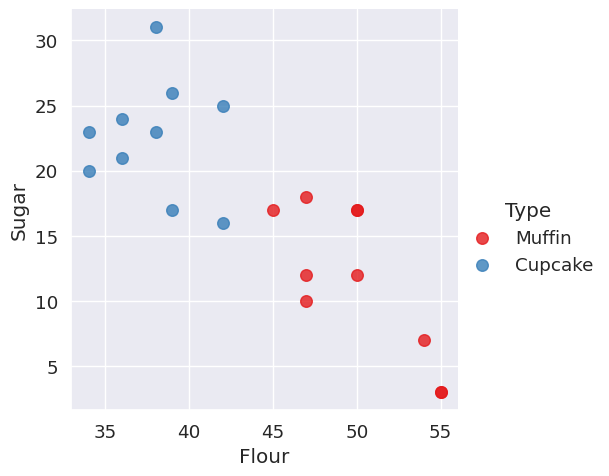

In [5]:
print('We want to plot our data using SNS')
sns.lmplot(data=recs, x='Flour', y='Sugar', hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.show()

In [6]:
print('the above plot shows some data as how it appears, though we want it to be more processed as to have it appear more precise')
type_label = np.where(recs['Type']=='Muffin',0,1)
rec_features = recs.columns.values[1:].tolist()
rec_features
ingredients = recs[['Flour','Sugar']].values
print(ingredients)

the above plot shows some data as how it appears, though we want it to be more processed as to have it appear more precise
[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [7]:
print('now to get the model to fit to the pruned data')
model = svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

now to get the model to fit to the pruned data


SVC(kernel='linear')

getting a hyperplane now
this shows how the data can deliniate where the datapoints approach the plane


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


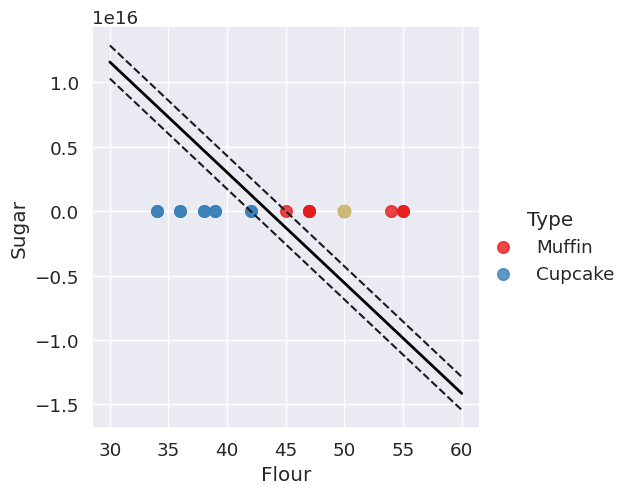

In [8]:
print('getting a hyperplane now')
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a*xx - (model.intercept_[0] / w[1])


b = model.support_vectors_[0]
yy_down = a*xx+(b[1]-a*b[0])
b = model.support_vectors_[-1]
yy_up = a*xx+(b[1]-a*b[0])

print('this shows how the data can deliniate where the datapoints approach the plane')
sns.lmplot(data=recs, x='Flour', y='Sugar', hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')
plt.plot(50,20,'yo',markersize='9')

In [9]:
print('lets create a predictive fucntion using flower and sugar')
def muff_or_cup(flour,sugar):
    if(model.predict([[flour,sugar]]))==0:
        print('Youre looking at some Muffins')
    else:
        print('Youre looking at some cupcakes!')

print('lets use some values 50 flour and 20 sugar, what will we get?',muff_or_cup(50,20) )
#current time in video is around 1:19:55

lets create a predictive fucntion using flower and sugar
Youre looking at some Muffins
lets use some values 50 flour and 20 sugar, what will we get? None


0
0
0
0
0
0
0


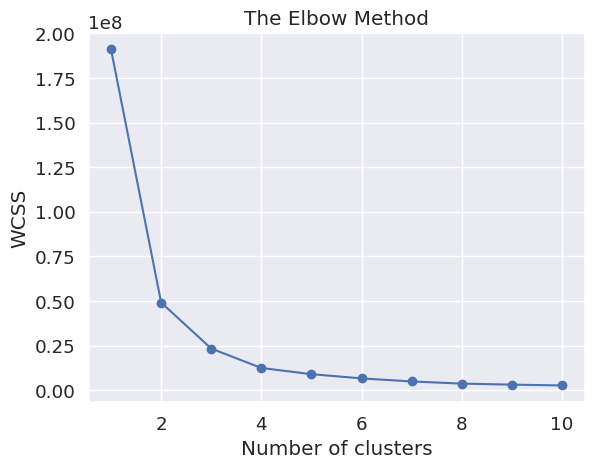

[2 1 0 2 1 2 2 2 0 1 1 1 2 0 0 2 1 0 1 1 1 1 0 2 1 1 1 2 0 1 1 0 1 0 1 0 1
 1 2 0 2 2 0 0 0 1 2 1 1 0 2 0 0 1 2 2 0 1 1 2 0 1 0 1 2 0 1 1 1 2 0 1 1 1
 1 0 0 1 1 1 2 2 0 1 1 1 0 0 1 1 1 1 2 0 1 2 2 0 2 2 2 2 1 1 1 1 1 1 1 0 1
 0 2 1 1 2 0 0 1 2 1 1 2 0 1 1 2 1 1 1 1 1 2 0 2 2 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 2 0 1 0 1 1 1 0 0 2 0 0 1 0 0 1 0 1 1 0 0 1 1 1 2 0 0 1 0 1 2 0 1
 0 0 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 0 0 1 2 1 0 2 0 0 0 1 1 0 1 1 2 1 2 0 0
 2 2 2 1 2 1 1 0 0 1 1 2 0 1 2 0 1 1 2 0 2 1 2 0 2 1 1 1 1 1 0 2 0 1 2 1 0
 0 0] 
 [[1.400e+01 8.000e+00 3.500e+02 ... 4.209e+03 1.200e+01 1.972e+03]
 [3.190e+01 4.000e+00 8.900e+01 ... 1.925e+03 1.400e+01 1.980e+03]
 [1.700e+01 8.000e+00 3.020e+02 ... 3.449e+03 1.100e+01 1.971e+03]
 ...
 [2.200e+01 6.000e+00 2.320e+02 ... 2.835e+03 1.500e+01 1.983e+03]
 [1.800e+01 6.000e+00 2.320e+02 ... 3.288e+03 1.600e+01 1.972e+03]
 [2.200e+01 6.000e+00 2.500e+02 ... 3.353e+03 1.500e+01 1.977e+03]]


In [10]:
# Read the dataset
cars = pd.read_csv("/kaggle/input/cars-for-kmeans/cars (dataset for k means).csv")

# Handle missing values
#this method will not work as it just blanket changes the items that are strings even though they are numbers, it errors out
#x = cars.fillna(cars.mean())

#better working version
x = cars[cars.columns[:-1]]
#x = x.convert_objects(convert_numeric=True) , this is deperciated now, use the following
x= x._convert(numeric=True)
x.head()

#elm null values
for i in x.columns:
    x[i] = x[i].fillna(int(x[i].mean()))
for i in x.columns:
    print(x[i].isnull().sum())

# Perform K-means clustering and find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


kmeansA = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeansA.fit_predict(x)
x= x.values
print(y_kmeans,'\n',x)

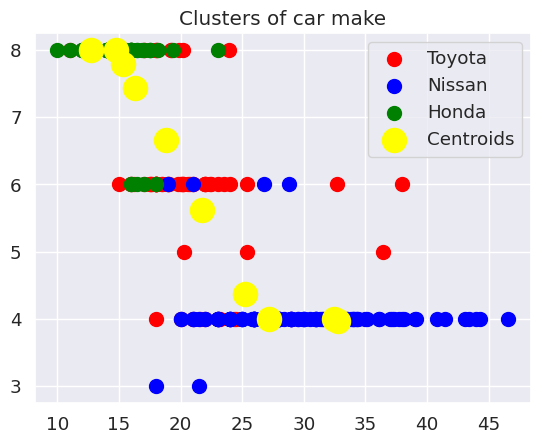

In [11]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],s=100,c='red',label='Toyota')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],s=100,c='blue',label='Nissan')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],s=100,c='green',label='Honda')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car make')
plt.legend()
plt.show()

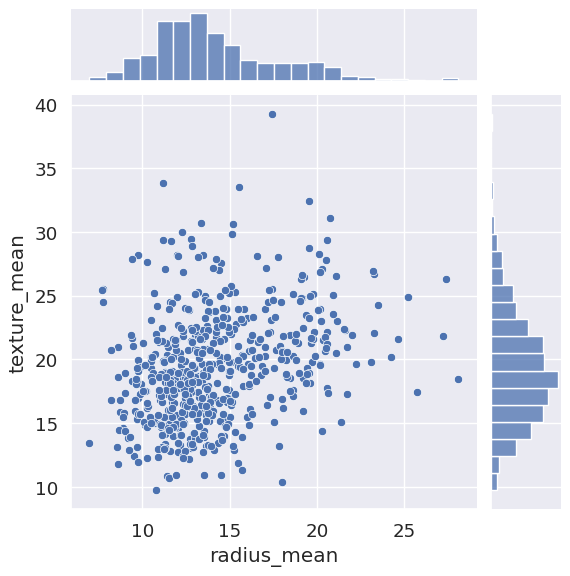

In [12]:
#now we are going to user logestic regression to find some data on weather a tumor is malignent
tumor = pd.read_csv('/kaggle/input/tumor-size/data (1) (dataset for logistic).csv')
sns.jointplot(x='radius_mean',y='texture_mean',data = tumor)


/tmp/ipykernel_32/2034116157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tumor.corr()) #plotting an unalterrted heatmap along with null values if any in the data


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

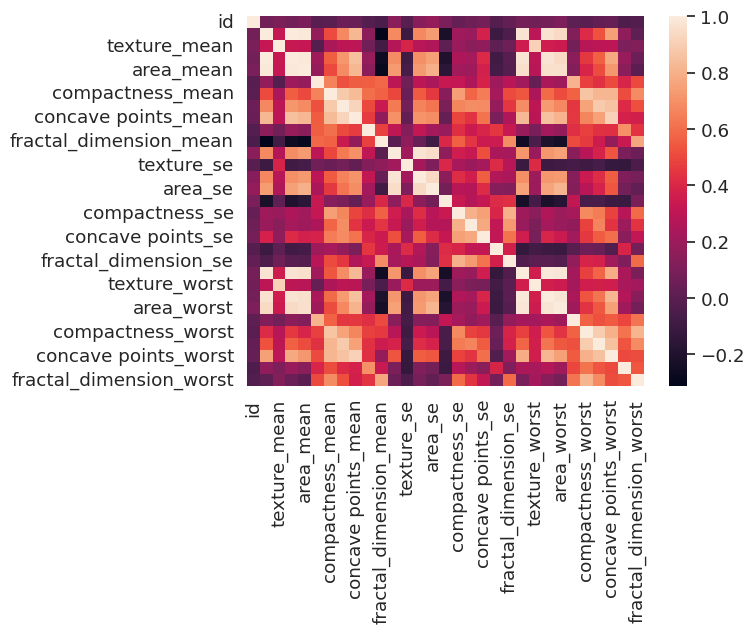

In [13]:
sns.heatmap(tumor.corr()) #plotting an unalterrted heatmap along with null values if any in the data
tumor.isnull().sum()

In [14]:
#we will want to create an array with the worst possible data points and the diagnosis
worstX=tumor[['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'
]]
worstY=tumor['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(worstX, worstY, test_size=0.3, random_state=101)

#running the model without a max iteration limit will cause it to error out hence the 1000
logModel = LogisticRegression(max_iter=1000)
logModel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
#now we do the predictions
y_pred = logModel.predict(X_test)
print('the printer array shows how using a model it will classify if the tumor is benign or malignent')
print(y_pred)
print('\nNow we will see how well the results match up\n',classification_report(y_test,y_pred))

the printer array shows how using a model it will classify if the tumor is benign or malignent
['B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B'
 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B'
 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B']

Now we will see how well the results match up
               precision    recall  f1-score   support

           B       0.93      0.95      0.94       105
           M       0.92      0.89      0.91        66

In [16]:
#some linear algebra refreshers

matA = np.array([10,15])
matB = np.array([20,9])
matD = np.dot(matA,matB) #this is the dot product in linear algebra
print(matA,'\n',matB)
matC = matA.T+matB.T #using .T transposes the arrays
print(matC)
print((10*20)+(15*9))
print(matD)

[10 15] 
 [20  9]
[30 24]
335
335


In [17]:
#lets do some calculus, specifically finding the limit of something 
#neural networks achive the speed that they need by first going establishing layer, then differenting the diffrent layers
# first layer will affect second layer and so on, this is proved by calculus
#Gradiant Descent

cur_x = 5 #algo starts at 3
rate = 0.1
precision = 0.5 # how close it should be to stopping
previous_step_size = 1
max_iters = 1000000 # one million iterations
iters = 0
df = lambda x: 2*(x+5) # gradiant of our function

while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #storing current value
    cur_x = cur_x - rate * df(prev_x) #evaluation the new value by the formula
    previous_step_size = abs(cur_x - prev_x) # the new x
    iters = iters +1 #iteration count
    print('Iteration',iters,'\nX value is',cur_x)
    
print('The local minimum occurs at', cur_x)
#scipi does this as a built in function buttt this can be more fun since you get to learn the diffrent functions


Iteration 1 
X value is 3.0
Iteration 2 
X value is 1.4
Iteration 3 
X value is 0.11999999999999966
Iteration 4 
X value is -0.9040000000000001
Iteration 5 
X value is -1.7232000000000003
Iteration 6 
X value is -2.3785600000000002
Iteration 7 
X value is -2.902848
Iteration 8 
X value is -3.3222784
The local minimum occurs at -3.3222784


Means 71000.0
Median 54000.0
Mode 0    50000
Name: Salary, dtype: int64


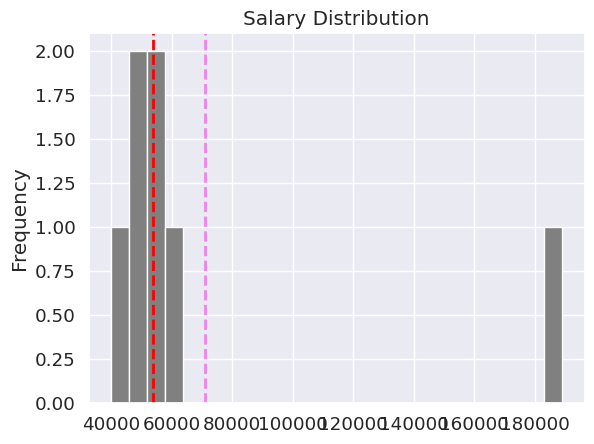

In [18]:
dfD = pd.DataFrame({'Name': ['Jane','Michael','Willian','Rosy','Hana','Ferdie','Graeme'],'Salary':[50000,54000,50000,189000,55000,40000,59000]})
print('Means',dfD['Salary'].mean())
print('Median', dfD['Salary'].median())
print('Mode',dfD['Salary'].mode())

%matplotlib inline
salary = dfD['Salary']
salary.plot.hist(title='Salary Distribution', color='Grey',bins=25)
plt.axvline(salary.mean(),color='violet',linestyle='dashed',linewidth=2)
plt.axvline(salary.median(), color='red',linestyle='dashed',linewidth=2)
plt.show()

In [19]:
#lets create a set to show some probabilities
set1 = {4,7}
print(set1)

#now we convert that set into a list to change it around
newList = [1,2,3,4, 4]
setFromList = set(newList)
print(setFromList)

from itertools import product as prod

ap = set([x for x in range(1,7)])
bp = set([x for x in range(1,7)])
pp = list(prod(ap,bp))

print('Ap is the set of all possible outcomes of a dice: ',ap)
print('Bp is the set of all possible outcomes of a dice: ',bp)
print('products ap and bp are true for all possible combinations of Ap and Bp thrown together:\n',pp)


#we can toss two dice and see what happens here

n_dice = 2
dice_faces = {1,2,3,4,5,6}
#now make the event space

event_space = set(prod(dice_faces, repeat=n_dice))
event_space

print('this is a new line')
for outcome in event_space:
    print(outcome,end =', ')
print()
print(len(event_space))

#now lets do it for a sum of something
faveOutcome = []
for outcome in event_space:
    x,y = outcome
    if (x+y)%3 == 0:
        faveOutcome.append(outcome)
faveOutcome = set(faveOutcome)

for f_outcome in faveOutcome:
    print(f_outcome, end=', ')
print()
print(len(faveOutcome))

prob = len(faveOutcome)/len(event_space)
print('The probability of getting a sum which is a multiple of 3 is: ',prob)



{4, 7}
{1, 2, 3, 4}
Ap is the set of all possible outcomes of a dice:  {1, 2, 3, 4, 5, 6}
Bp is the set of all possible outcomes of a dice:  {1, 2, 3, 4, 5, 6}
products ap and bp are true for all possible combinations of Ap and Bp thrown together:
 [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
this is a new line
(3, 4), (4, 3), (3, 1), (5, 4), (4, 6), (5, 1), (2, 2), (1, 6), (2, 5), (1, 3), (6, 2), (6, 5), (4, 2), (4, 5), (3, 3), (5, 6), (3, 6), (5, 3), (2, 4), (1, 2), (2, 1), (1, 5), (6, 1), (6, 4), (3, 2), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (1, 1), (1, 4), (2, 3), (2, 6), (6, 6), (6, 3), 
36
(2, 4), (1, 2), (2, 1), (1, 5), (5, 4), (5, 1), (4, 2), (4, 5), (3, 3), (3, 6), (6, 6), (6, 3), 
12
The probability of getting a sum which is a multipl

In [20]:
#now for a sum of a multiple of 5 but not of 3
n_diceA = 5
dice_faces = {1,2,3,4,5,6}
#now make the event space

event_spaceA = set(prod(dice_faces, repeat=n_diceA))
faveOutcomes = []
for outcomesA in event_spaceA:
    d1,d2,d3,d4,d5 = outcomesA
    if (d1+d2+d3+d4+d5)%5 == 0 and (d1+d2+d3+d4+d5)%3!=0:
        faveOutcomes.append(outcomesA)
faveOutcomes = set(faveOutcomes)
len(faveOutcomes)
probA = len(faveOutcomes)/len(event_spaceA)
print('The probability of getting a sum which is a multiple of 5 and not 3 is: ',probA)

The probability of getting a sum which is a multiple of 5 and not 3 is:  0.11625514403292181


In [21]:
#it is naive bayes time to learn and do
sna = pd.read_csv('/kaggle/input/socialnetworkads/SocialNetworkAds.csv')
print(sna.head())

xsna = sna.iloc[:,[2,3]].values
ysna = sna.iloc[:,4].values

X_train, X_test, y_train, y_test = train_test_split(xsna,ysna,test_size = 0.25, random_state = 0)

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [22]:
#time to feature scale
scx = StandardScaler()
X_train = scx.fit_transform(X_train)
X_test = scx.transform(X_test)

print(X_train[:3])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]]


In [23]:
#now we fit the Naive Bayes to the training set, lets see what outliers there are
classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
print('This should show how much is correct\ntr is true pos, tl is false pos, br is false neg and bl is true neg')
cm = confusion_matrix(y_test,y_pred)
cm

This should show how much is correct
tr is true pos, tl is false pos, br is false neg and bl is true neg


array([[65,  3],
       [ 7, 25]])

/tmp/ipykernel_32/2560529602.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],


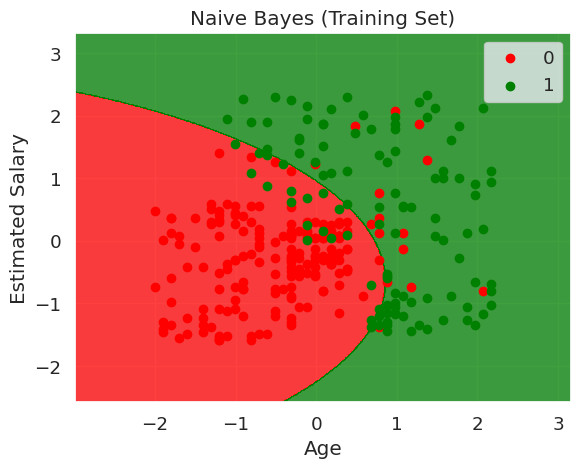

In [24]:
#we want to graph this as to show it better
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() +1, step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
               c=ListedColormap(('red','green'))(i), label = j)

plt.title('Naive Bayes (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/tmp/ipykernel_32/2150728929.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(companies.corr())


<Axes: >

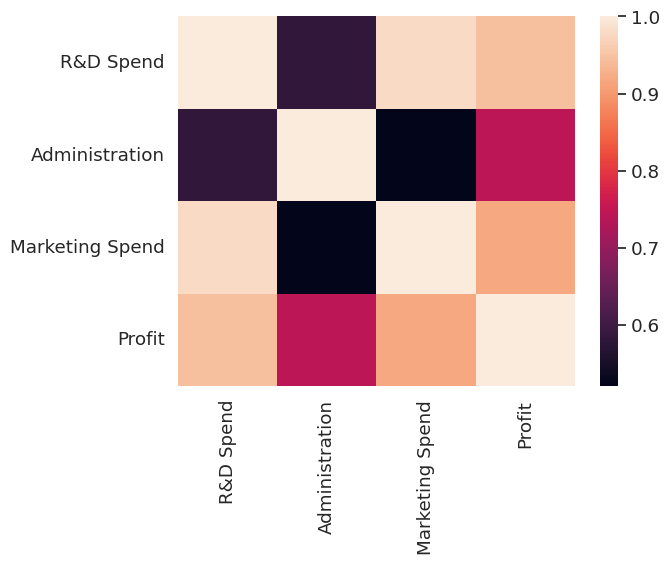

In [25]:
#multiple linear regressions
%matplotlib inline
companies =pd.read_csv("/kaggle/input/1000companies/1000_Companies.csv")
xxx = companies.iloc[:, :-1].values #take everyrow except last one
yyy = companies.iloc[:, :4].values #take every column except last 4

companies.head()
sns.heatmap(companies.corr())

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

companies =pd.read_csv("/kaggle/input/1000companies/1000_Companies.csv")
xxx = companies.iloc[:, :-1].values #take everyrow except last one
yyy = companies.iloc[:, -1].values #take every column except last 4

labelencoder = LabelEncoder()
xxx[:,3] = labelencoder.fit_transform(xxx[:,3])

# Define the indices of categorical columns
categorical_features_indices = [3]

# Create a ColumnTransformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features_indices)
    ],
    remainder='passthrough'  # You can specify other transformers for non-categorical columns
)

# Fit and transform your data
xxx = preprocessor.fit_transform(xxx)
#now we will remove the index column since its just false data
xxx=xxx[:,1:]
#its time to train it!
X_train, X_test, y_train,y_test = train_test_split(xxx, yyy, test_size =0.2, random_state = 0)
regressor = LinearRegression()
#I have an error here where the table data cant be converted from a string to numerical, the onehotencoder should be rectifiying this
#but currently it does not, need to investigate
# Train the model
regressor.fit(X_train, y_train)

#previously we had included y_train but this gave off some simaler results however beacuse it was a 2d array
#it could not be used for computing the R2 score which is only a 1d array algo
y_pred = regressor.predict(X_test)

# this fixes it yyy = companies.iloc[:, -1].values, taking out the : solved the issue
#companies.head()
print(y_pred)
print("Time to print out the coefficients for y=mx+b:",regressor.coef_)
print("This will calculate the intecept for y=mx+b:",regressor.intercept_)

# Obtain predictions using the trained model
# Evaluate the model, this will show how close/accurte we are from predicited trained model to actual
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)
#a score of 91% is pretty decent confidence though these numbers could be a bit higher, to do that youll need to 
#include more data, more repetitions of the model to make it worth while


[ 89790.61532915  88427.07187361  94894.67836971 175680.86725611
  83411.73042088 110571.90200074 132145.2293644   91473.37719686
 164597.05380607  53222.826674    66950.19050989 150566.43987005
 126915.20858596  59337.85971049 177513.91053062  75316.28143051
 118248.14406603 164574.40699902 170937.2898107  182069.11645085
 118845.03252689  85669.95112228 180992.59396144  84145.08220144
 105005.83769214 101233.56772746  53831.0766909   56881.41475223
  68896.39346904 210040.00765884 120778.72270894 111724.87157654
 101487.90541517 137959.02649624  63969.95996743 108857.91214126
 186014.72531988 171442.64130748 174644.26529205 117671.49128195
  96731.37857433 165452.2577941  107724.34331255  50194.54176912
 116513.89532179  58632.4898682  158416.4682761   78541.48521609
 159727.66671744 131137.87699644 184880.70924517 174609.0826688
  93745.66352059  78341.13383417 180745.9043908   84461.61490552
 142900.90602903 170618.44098397  84365.09530839 105307.3716218
 141660.07290787  52527.343

In [27]:
#image recognition time! this uses a built in sklearn dataset for numbers
digits = load_digits()

print("Image data shape", digits.data.shape)
print("Label data shape", digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


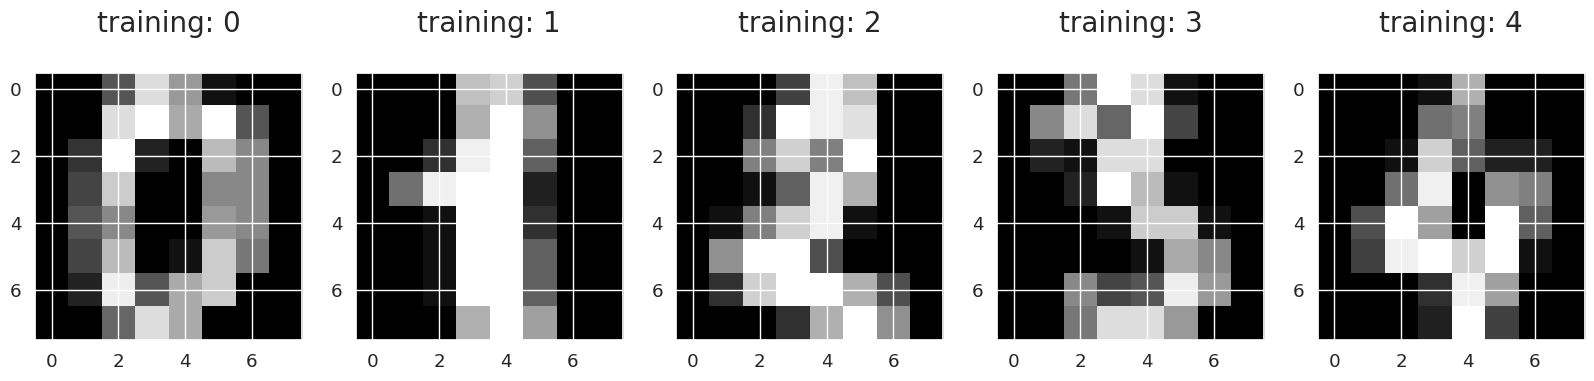

In [28]:
#what this will do is show the plots of training data of numbers that will show the shapes
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('training: %i\n' % label, fontsize = 20)

In [29]:
#the data will now be trained to show how good it looks
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1383, 64)
(1383,)
(414, 64)
(414,)


In [30]:
#implementiing the data that was trained from the digits dataset
#this comes back with a max iterations so will have to be redone to boost the iteration sup to 1000 maybe?

logisticRegr = LogisticRegression(max_iter=2000)
logisticRegr.fit(x_train,y_train)
print(logisticRegr.predict(x_test[1].reshape(1,-1)))

logisticRegr.predict(x_test[0:10])
predictNum = logisticRegr.predict(x_test)

scores = logisticRegr.score(x_test,y_test)
print("Accuracy:",scores)


[0]
Accuracy: 0.9492753623188406


In [31]:
#this is to show the confusion matrix based on how accurate the model trained
cm = metrics.confusion_matrix(y_test,predictNum)
print("Confusion Matrix for number prediction\n",cm)

Confusion Matrix for number prediction
 [[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  1  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  2  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 43  0  0  0  1]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  1  0  0  0 36  1]
 [ 0  0  0  1  0  1  0  0  1 31]]


New plot


Text(0.5, 1.0, 'Accuracy Score: 0.9492753623188406')

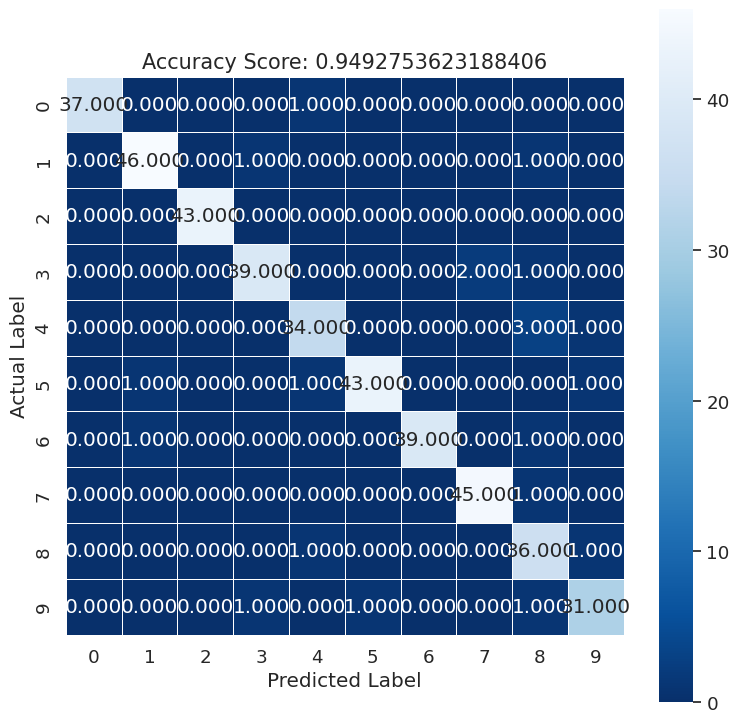

In [32]:
print('New plot')
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(scores)
plt.title(all_sample_title, size= 15)

now another graph, this will show predicted vs actual


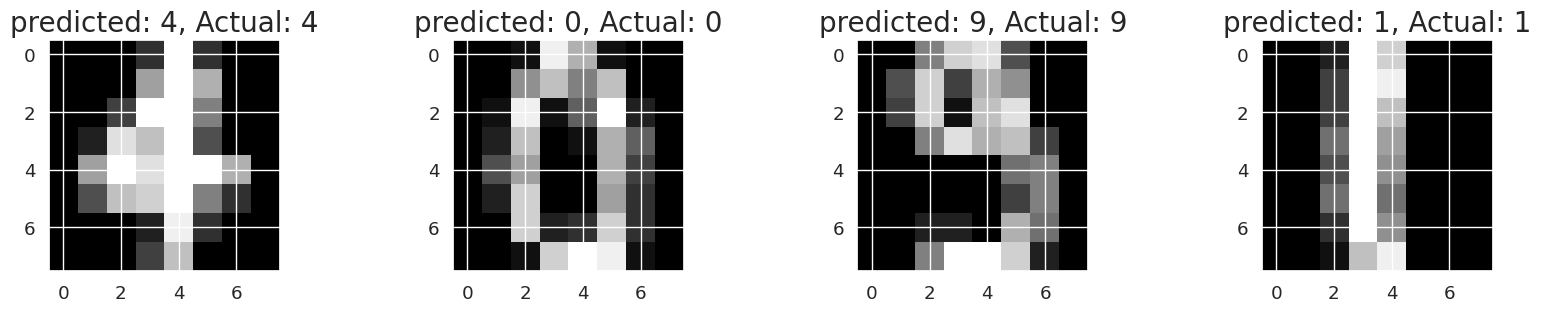

In [33]:
print('now another graph, this will show predicted vs actual')
index = 0
classifiedIndex = []
for predict, actual in zip(predictNum, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1

plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)), cmap=plt.cm.gray)
    plt.title("predicted: {}, Actual: {}".format(predictNum[wrong],y_test[wrong]),fontsize=20)

In [34]:
#this will be a mainly confusion matrix focused demo
heart =pd.read_csv("/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv")
print('column 13 has condition instead of target, also the data seems to be a little big off')
heart


column 13 has condition instead of target, also the data seems to be a little big off


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [35]:
#we are dropping the last column as the data is not needed
#heart = data, yH & xH are to diffrenetiate from the above variables
yH = heart['condition']
xH = heart.drop('condition',axis = 1)
print(xH.head())

#this will use a standard training model for preprocessing, nothing fancy, 20% test size 80% train
X_train, X_test, y_train, y_test, = train_test_split(xH,yH, test_size = 0.2, random_state = 42)

scalerH = StandardScaler()
scaleH = scalerH.fit(X_train)
X_train = scaleH.transform(X_train)
X_test = scaleH.transform(X_test)

#now creating a standard logistic regression
modelH = LogisticRegression()
modelH.fit(X_train,y_train)
predH = modelH.predict(X_test)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  
0   1     0  
1   2     0  
2   0     0  
3   1     0  
4   0     0  


In [36]:
#this is to get the accuracy score only for our model
scoreH = accuracy_score(y_test,predH)
print('This is how accurate our model is based on our trained data from the UCI heart CSV: ',scoreH)

#now well need the confusion matrix to get all the good stuff
print('Now viewing this data as such can be a little confusing, thankfully we can pull it apart just below')
confusion_matrix(y_test,predH)



This is how accurate our model is based on our trained data from the UCI heart CSV:  0.7333333333333333
Now viewing this data as such can be a little confusing, thankfully we can pull it apart just below


array([[23,  9],
       [ 7, 21]])

In [37]:
tn,fp,fn,tp = confusion_matrix(y_test,predH).ravel()
print('Here is our True Negative: ',tn,'\nHere is our False Negative: ',fn,'\nHere is our True Positive: ',tp,'\nHere is our False Positive: ',fp)

Here is our True Negative:  23 
Here is our False Negative:  7 
Here is our True Positive:  21 
Here is our False Positive:  9


In [38]:
#Welcome one and all to a python decsion tree that will see if a car loan will default!

balance_data = pd.read_csv('/kaggle/input/car-loan-decision-tree-repayment/CarLoanRepaymentDecisionTree.csv',sep = ',', header = 0)
balance_data = balance_data.drop('Unnamed: 5', axis=1)
balance_data.head() 

,Result,Initial Payment,Last Payment,Credit Score,House Number
0,yes,201,10018,250,3046
1,yes,205,10016,395,3044
2,yes,257,10129,109,3251
3,yes,246,10064,324,3137
4,yes,117,10115,496,3094


In [39]:
#we want to find out the length of the CSV file since it contains over 1000 records
print('Dataset Length:: ',len(balance_data))
print('Dataset Shape:: ',balance_data.shape)

Dataset Length::  1000
Dataset Shape::  (1000, 5)


In [40]:
#to figure out how to train the Decision tree, the data itself has to be sifted to figure out what will give out the max gain
xCarLoan = balance_data.values[:,1:5]
yCarLoan = balance_data.values[:,0]

#splitting our dataset up as one does to train and test it against it self
x_train, x_test, y_train, y_test = train_test_split(xCarLoan,yCarLoan, test_size=0.3, random_state=100)

#this function will find the entropy of a system based on how the data can be shuffled 
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [41]:
#We will want to predict something with this data now
y_pred_en = clf_entropy.predict(x_test)
y_pred_en

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'ye

In [42]:
#now we will see the accuracy, it is somewhat on point but could be better
print('Accuracy of this Car Loan model is : ',accuracy_score(y_test,y_pred_en)*100)

Accuracy of this Car Loan model is :  93.66666666666667


In [43]:
#Delving into a Random Forest now

irisA = load_iris()
irisB = pd.read_csv('/kaggle/input/iris-random-forest/iris.csv')

#for iA we are following the built in data set
#for iB we are using a downloaded version, this will help compare the data between the two
iA = pd.DataFrame(irisA.data,columns=irisA.feature_names)
iB = pd.DataFrame(irisB)
iB = iB.drop('Id', axis=1)


iA.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
iB.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
#it appears we are missing a column in the built in database iris whereas the downloaded copy of iris already shows it
#lets add the species so we know whats happeneing

iA['Species'] = pd.Categorical.from_codes(irisA.target,irisA.target_names)
iA.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
#here we do a train/test with the built in database
iA['is_train'] = np.random.uniform(0,1,len(iA)) <= .75
iA.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,False
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,False
4,5.0,3.6,1.4,0.2,setosa,True


In [47]:
#Now this is with the downloaded database, take a look at the is_train column
iB['is_train'] = np.random.uniform(0,1,len(iB)) <= .75
iB.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,is_train
0,5.1,3.5,1.4,0.2,Iris-setosa,False
1,4.9,3.0,1.4,0.2,Iris-setosa,True
2,4.7,3.2,1.3,0.2,Iris-setosa,True
3,4.6,3.1,1.5,0.2,Iris-setosa,True
4,5.0,3.6,1.4,0.2,Iris-setosa,False


In [58]:
#Lets create new dataframes for our trained data
trainA, testA = iA[iA['is_train']==True], iA[iA['is_train']==False]
trainB, testB = iB[iB['is_train']==True], iB[iB['is_train']==False]

print('The number of observations in the built in training data:',len(trainA),'\nAs well as the number of observations in the test data:',len(testA))
print('\n')
print('This is the trained data from a downloaded copy of Iris, the training data:', len(trainB),'\nHere is the tested data:',len(testB))


def trainPercent(trainA, trainB):
    max_value = max(len(trainA), len(trainB))
    similarity = 1 - abs(len(trainA) - len(trainB)) / max_value
    percentA = similarity * 100

    return percentA

# Similarly, modify the testPercent function
def testPercent(testA, testB):
    max_value = max(len(trainA), len(trainB))
    similarity = 1 - abs(len(trainA) - len(trainB)) / max_value
    percentB = similarity * 100

    return percentB


print('\nNow beacuse we want to calculate to see the similarity of the two databases\nWe ran the numbers thru a small function to calculate that')
print('The train data percentage: ',trainPercent(trainA,trainB),'\nThe test data percentage:  ',testPercent(testA, testB))
print('In the end, both datasets are pretty simaler')



The number of observations in the built in training data: 113 
As well as the number of observations in the test data: 37


This is the trained data from a downloaded copy of Iris, the training data: 111 
Here is the tested data: 39

Now beacuse we want to calculate to see the similarity of the two databases
We ran the numbers thru a small function to calculate that
The train data percentage:  98.23008849557522 
The test data percentage:   98.23008849557522
